# T-test 



## 1. Loading the data set and libraries
#### This tutorial leverages the midwest data that is provided by the ggplot2 package for the one and two-sample independent t-tests. The paired t-test will be illustrated with the built in *sleep* data set.  
#### *midwest*  contains the Demographic information of midwest counties



In [12]:
library(ggplot2)        # plotting & data

library(gridExtra)      # provides side-by-side plotting

head(midwest)


PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


In [2]:
unique(midwest$state)
#help(midwest)

[1] "IL" "IN" "MI" "OH" "WI"

In [3]:
collegeAll=midwest$percollege
length(collegeAll)
collegeIL=collegeAll[which(midwest$state=='IL')]
length(collegeIL)
collegeIN=collegeAll[which(midwest$state=='IN')]
length(collegeIN)
collegeOH=collegeAll[which(midwest$state=='OH')]
length(collegeOH)
collegeMI=collegeAll[which(midwest$state=='MI')]
length(collegeMI)

[1] 437

[1] 102

[1] 92

[1] 88

[1] 83

## 2. T-test function in R

### The t.test() function can be used to perform both one and two sample t-tests on vectors of data. The function contains a variety of arguments and is called as follows:

 **t.test(x, y = NULL, alternative = c("two.sided", "less", "greater"), mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)**

## **This is what you should be doing...**
 
 Suppose that the gene expression data from two groups of patients (experimental) are availabe and that the hypothesis is about the difference
between the population means $\mu_1$ and $\mu_2$.

Thus $H_0: \mu_1 = \mu_2$ is to be tested against  $H_0: \mu_1 \neq \mu_2$. If the gene expression data are $\left( x_1...x_n \right)$ and $\left(y_1...y_n\right)$ for the first and second group, respectively. 

With the mean and variances of the first and the second groups being $\bar{x}$, $\bar{y}$ , $s_1^2$,$s_2^2$.

Then the t-statistic can be formulated as:

$$ t =  \frac{(\bar{x}-\bar{y})-(\mu_1-\mu_2)}{\sqrt{\frac{s_1^2}{n}+\frac{s_2^2}{m}}}$$


---
**Note**: the t-value is large if the difference between $\bar{x}$ and $\bar{y}$ is large and the standard deviations $s_1$ and $s_2$ are small. This corresponds to the **Welch two-sample t-test**.

## One Sample T-Test
### The one-sample t-test compares a sample’s mean with a known value, when the variance of the population is unknown. 
### EXAMPLE: <br> we want to assess the percent of college educated adults in the midwest and compare it to a certain value. Assume the nation-wide average of college educated adults is 32% (Bachelor’s degree or higher) and we want to see if the midwest mean is significantly different than the national average; in particular we want to test if the midwest average is less than the national average.



[1] 19.63139 11.24331 17.03382 17.27895 14.47600 18.90462 11.91739 16.19712
 [9] 14.10765 41.29581

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.336  14.114  16.798  18.273  20.550  48.079 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


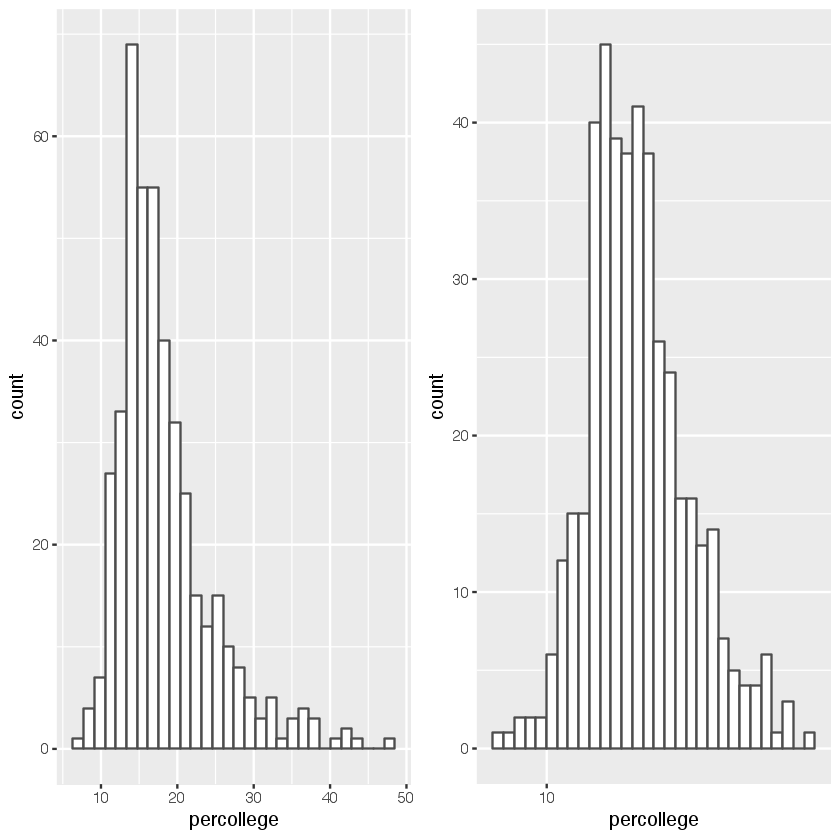

In [4]:
head(midwest$percollege, 10)

summary(midwest$percollege)


p1 <- ggplot(midwest, aes(percollege)) + 
        geom_histogram(fill = "white", color = "grey30")

p2 <- ggplot(midwest, aes(percollege)) + 
        geom_histogram(fill = "white", color = "grey30") +
        scale_x_log10()

grid.arrange(p1, p2, ncol = 2)

### Note above the non-normality of the sample distribution which can be corrected with a log transformation. 
### Although the Central Limit Theorem provides some robustness to the normality assumption, this is important to know so we can test our data a couple different ways to provide a comprehensive conclusion.


To test if the midwest average is less than the national average I’ll perform three tests. 
First I test with a normal t.test without any distribution transformations. 



In [5]:
t.test(midwest$percollege, mu = 32, alternative = "less")


	One Sample t-test

data:  midwest$percollege
t = -45.827, df = 436, p-value < 2.2e-16
alternative hypothesis: true mean is less than 32
95 percent confidence interval:
    -Inf 18.7665
sample estimates:
mean of x 
 18.27274 


The results above show a **p-value < .001** supporting the alternative hypothesis that “the true mean is less than 32%.”


## Alternative approaches

to ensure our results are not being biased due to assumption violations We can:<br> perform the test with t.test and transform our data <br> perform the nonparametric test with the wilcox.test function. 


In [6]:

t.test(log(midwest$percollege), mu = log(32), alternative = "less")

wilcox.test(midwest$percollege, mu = 32, alternative = "less")



	One Sample t-test

data:  log(midwest$percollege)
t = -41.496, df = 436, p-value < 2.2e-16
alternative hypothesis: true mean is less than 3.465736
95 percent confidence interval:
     -Inf 2.879812
sample estimates:
mean of x 
 2.855574 



	Wilcoxon signed rank test with continuity correction

data:  midwest$percollege
V = 924, p-value < 2.2e-16
alternative hypothesis: true location is less than 32


Both results support our initial conclusion that the percent of college educated adults in the midwest is statistically less than the nationwide average.

## Exercise: 
### assess the percent of college educated adults in the Ilinois and compare it to  nation-wide average of college educated adults (32%) 

## Two-samples t-test with unequal variances (Welch t-test)

Now let’s say we want to compare the differences between the average percent of college educated adults in Ohio versus Michigan. Here, we want to perform a two-sample t-test.

The null hypothesis of equal means can be tested by using the appropriate factor and specification `var.equal = FALSE`.

In [7]:
summary(collegeOH)
summary(collegeMI)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.913  13.089  15.462  16.890  18.995  32.205 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.31   14.61   17.43   19.42   21.31   48.08 


	Welch Two Sample t-test

data:  collegeOH and collegeMI
t = -2.5953, df = 161.27, p-value = 0.01032
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.4568579 -0.6051571
sample estimates:
mean of x mean of y 
 16.89045  19.42146 


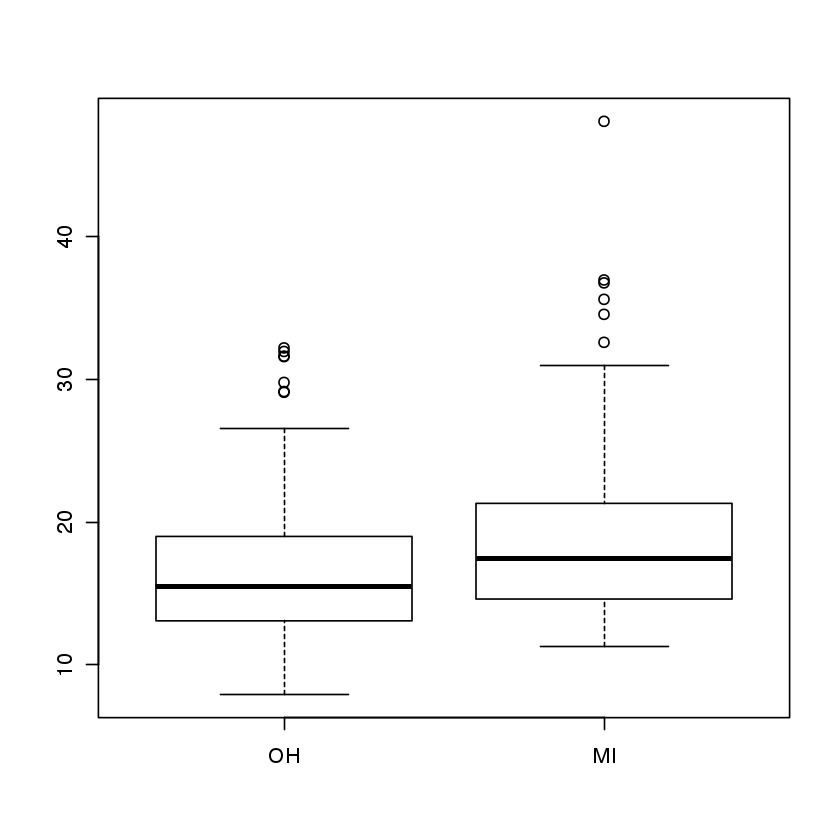

In [8]:
t.test(collegeOH,collegeMI, var.equal=FALSE)

boxplot(collegeOH,collegeMI,names=c('OH','MI'))

We can see Ohio appears to have slightly less college educated adults than Michigan but the graphic doesn’t tell us if it is statistically significant or not.
The *t* value is significantly large, meaning that the two means differ largely with respect to the corresponding (standard error). As the *p* value is very small,the conclusion is to reject the
null-hypothesis of equal means. The data provide strong evidence that the
population means do differ.

### 3.1 Two-samples Student-Fischer t-test (samples with equal variances).

Suppose the same setup as in the above example. In this case, however, the variances $\sigma_1^2$ and $\sigma_2^2$ for the two groups are known to be equal. To test $H_0: \mu_1 = \mu_2$ against $H_1: \mu_1 \neq \mu_2$ there is a t-test which is based on the pooled sample variance $s_p^2$. The latter is defined by the weighted sum of the sample variances $s_1^2$ and $s_2^2$ e.g.

$$ s_p^2 = \frac{(n-1)s_1^2+(m-1)s_2^2}{n+m-2}$$


Then the t-value will be

$$t = \frac{\bar{x}-\bar{y}-(\mu_1-\mu_2)}{s_p \sqrt{\frac{1}{n}+\frac{1}{m}}} $$


The null hypothesis for gene CCND3 Cyclin D3 is that the mean of ALL differs from that of AML patients can be tested by the two-sample t-test using:

In [9]:
t.test(collegeOH,collegeMI, var.equal=TRUE)



	Two Sample t-test

data:  collegeOH and collegeMI
t = -2.6076, df = 169, p-value = 0.009933
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.4471036 -0.6149114
sample estimates:
mean of x mean of y 
 16.89045  19.42146 


From the p-value 0.009933, the conclusion is to reject the null hypothesis
of equal population means. Note that the p-value is slightly smaller than
that of the previous test.

## Exercise: 
###  compare the differences between the average percent of college educated adults in Ohio versus Indiana.

## Paired T-Test
We use the built-in sleep data set. It consists of Student's Sleep Data which show the effect of two soporific drugs (increase in hours of sleep compared to control) on 10 patients.




extra,group,ID
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6


[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
Levels: 1 2

[1] 1  2  3  4  5  6  7  8  9  10 1  2  3  4  5  6  7  8  9  10
Levels: 1 2 3 4 5 6 7 8 9 10

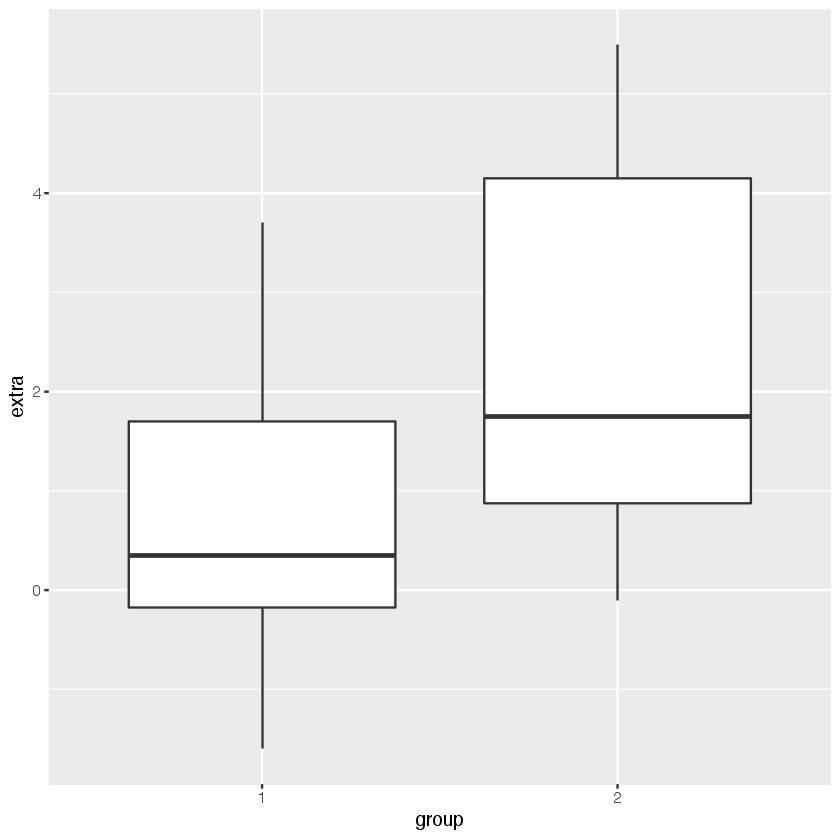

In [10]:
head(sleep)
sleep$group
sleep$ID

ggplot(sleep, aes(group, extra)) +
        geom_boxplot()



In this case we are assessing if there is a statistically significant effect of a particular drug on sleep (increase in hours of sleep compared to control) for 10 patients. 
We want to see if the mean values for the extra variable differs between group 1 and group 2. 
we perform the t.test with paired = TRUE 

In [11]:
t.test(extra ~ group, data = sleep, paired = TRUE)



	Paired t-test

data:  extra by group
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


### In this example it appears that the drug does have an effect as the p-value = 0.0028 suggesting that the drug increases sleep on average by 1.58 hours.